In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import metrics

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [7]:
target = train["Item_Outlet_Sales"].values

### We will combine test and train data for data exploration.

In [8]:
train['source']='train'
test['source']='test'
data = pd.concat([train,test],ignore_index = True)

In [9]:
data.shape

(14204, 13)

### Data Exploration

In [10]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

## 1. Correlation

In [11]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

### seperate categotical and numerical features

In [12]:
cat_data = data.select_dtypes(include =['object']).copy()

In [13]:
num_data = data.select_dtypes(exclude =['object']).copy()

In [14]:
cat_data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

In [15]:
num_data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
import seaborn as sns

In [17]:
corr = num_data.corr()

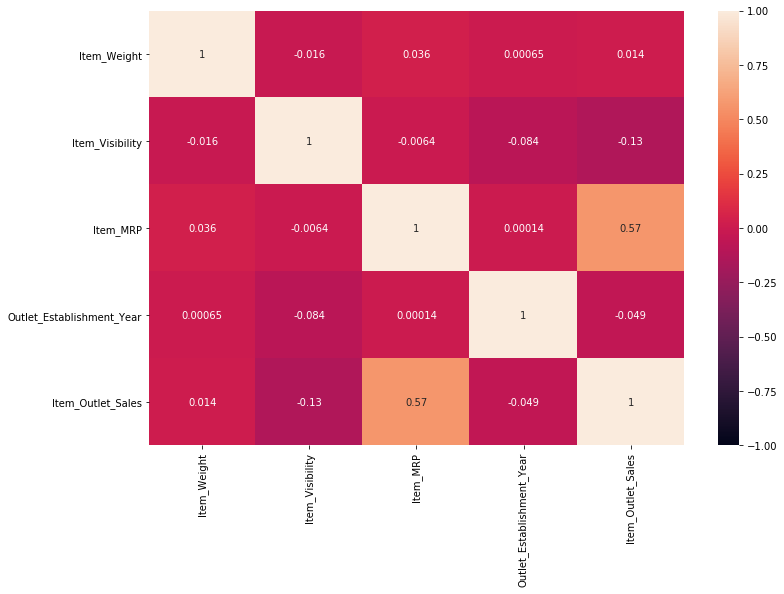

In [18]:
plt.figure(figsize = (12,8))
sns.heatmap(corr,annot = True,vmin = -1)
plt.show()

We can see the above heatmap, Item_MRP is highly correlated with the target feature

Lets check the scatter plot between them

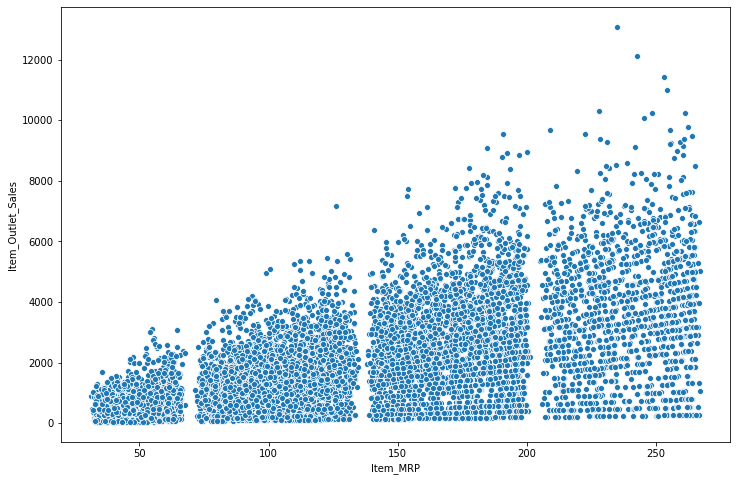

In [19]:
plt.figure(figsize = (12,8))
sns.scatterplot(x= train["Item_MRP"],y = train["Item_Outlet_Sales"],data = train)
plt.show()

We can see the relation is linear. We can use regression models.

### Univariate Analysis

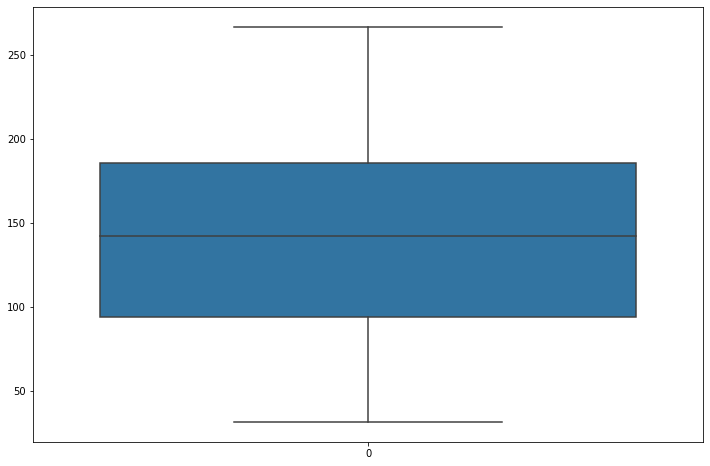

In [20]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data["Item_MRP"])
plt.show()

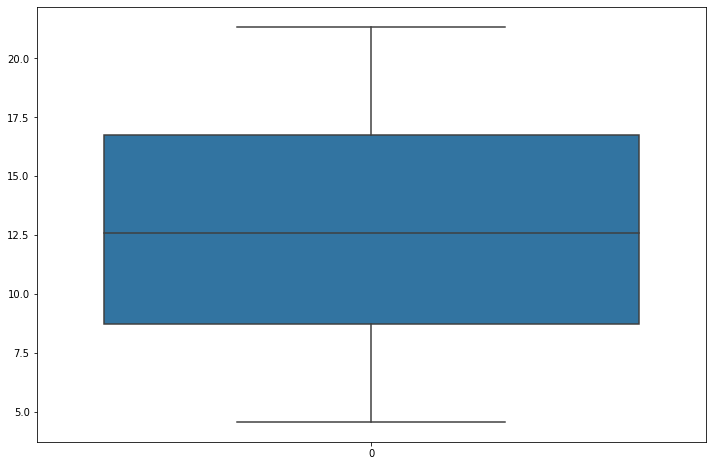

In [21]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data["Item_Weight"])
plt.show()

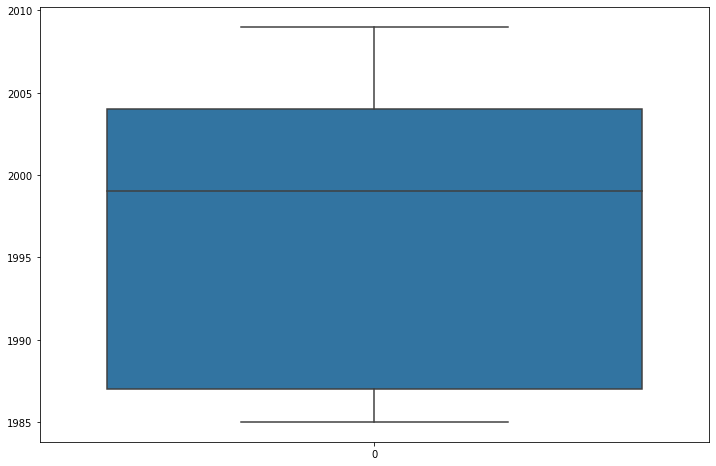

In [22]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data["Outlet_Establishment_Year"])
plt.show()

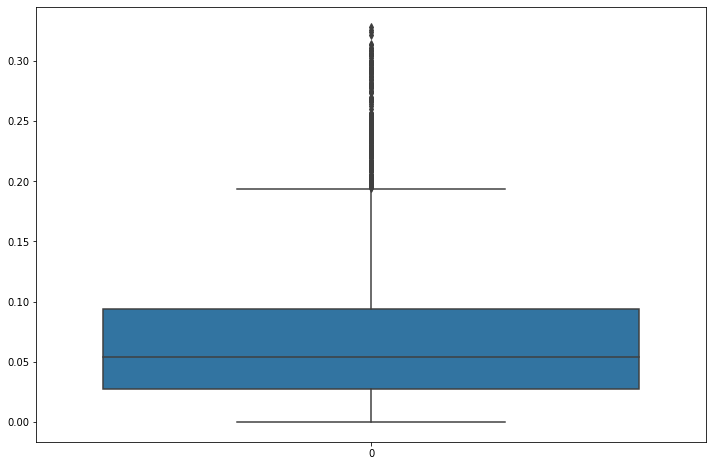

In [23]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data["Item_Visibility"])
plt.show()

Above we can see some outliers in Item_Visibility 

In [24]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


WE can see that the minimum value of Item_visibility is 0 which is also not possible. we need to do some imputations here along with the missing values.

### Now lets see the categorical variables

In [25]:
for col in cat_data.columns:
    print("\n\nFrequency of categorty in column %s"%col)
    print(cat_data[col].value_counts())



Frequency of categorty in column Item_Identifier
FDH14    10
FDA50    10
DRK35    10
FDJ26    10
DRC36    10
         ..
NCW54     7
FDM52     7
NCL42     7
FDL50     7
FDI46     7
Name: Item_Identifier, Length: 1559, dtype: int64


Frequency of categorty in column Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


Frequency of categorty in column Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


Frequency of categorty in column Outlet_I

### We can see above, the Item_Type - some categories are on repeat
Low Fat , low fat and LF are same
Regular and reg are same

## 2. Lets start with the imputations

### 1. Missing values

In [26]:
# replace the null values of Item_Weight with the mean value
data["Item_Weight"].fillna(data["Item_Weight"].mean(),inplace = True)

In [27]:
data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0],inplace = True)

In [28]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### 2. Outliers

In [29]:
data.loc[data["Item_Visibility"] > 0.25 ,"Item_Visibility"] = 0.25

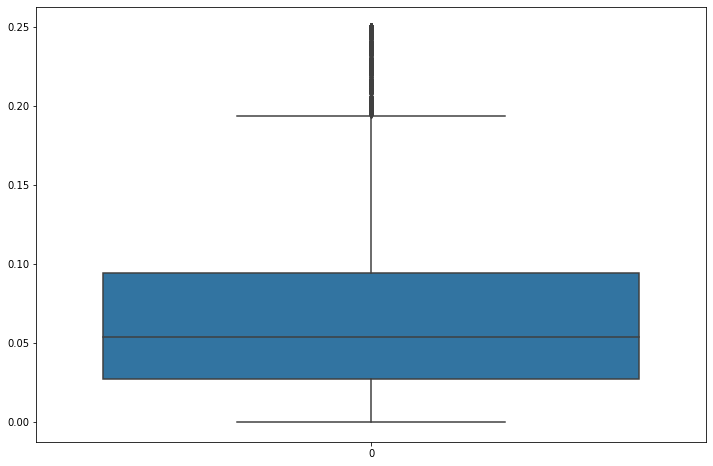

In [30]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data["Item_Visibility"])
plt.show()

Item_visibility has minimum value as 0
We will replace it with the mean value

In [31]:
data.loc[data["Item_Visibility"] == 0 ,"Item_Visibility"] = data["Item_Visibility"].mean()

In [32]:
data["Item_Visibility"].describe()

count    14204.000000
mean         0.069791
std          0.047638
min          0.003575
25%          0.033143
50%          0.062347
75%          0.094037
max          0.250000
Name: Item_Visibility, dtype: float64

## 3. Feature Engineering

1. Outlet_Establishment_Year 
We will change this feature into ineteger variable or we can say into Outlet Years by subtracting it from current year

In [34]:
data["Outlet_Year"] = 2020 - data["Outlet_Establishment_Year"]

2. Item Fat Content

In [33]:
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [35]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace({"LF" : "Low Fat", "reg" : "Regular","low fat" : "Low Fat"})

In [36]:
data["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

3. Item_Type

There are total16 categories in Item_Type, which we can combine into few only based on Item_Itedntifier

In [37]:
data["Item_Identifier"].apply(lambda x: x[0:2]).value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64

We can see there are 3 item types - Food, Non consumable and Drinks. We will create a new feature with only these categories

In [38]:
data["Item_Type_Cat"] = data["Item_Identifier"].apply(lambda x: x[0:2]) 

In [39]:
data["Item_Type_Cat"] = data["Item_Type_Cat"].replace({"FD" : "Food", "NC":"Non-Consumable","DR":"Drinks"})

After this, we need to add one more category to Item_Fat_Content with Non edible where Non Consumable itme type is present

In [40]:
data.loc[data["Item_Type_Cat"] == "Non-Consumable" ,"Item_Fat_Content"] = "Non-Edible"

In [41]:
data["Item_Fat_Content"].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

4. Outlet Identifier -- We need this feature for prediction but this is an object and we need this in float for regression models. So, we created a new feature Outlet and make this float by label encoding. We will keep Outlet Identifier as is.

In [42]:
data["Outlet"] = data["Outlet_Identifier"]

5. Lable encoding

We need Outlet_Identifier in the Output file, so we will leave it as is.

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()
cat_var = ["Item_Fat_Content", "Item_Type_Cat","Outlet_Size", "Outlet_Location_Type", "Outlet_Type","Outlet"]
for i in cat_var:
    data[i] = le.fit_transform(data[i])

In [45]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Year,Item_Type_Cat,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,21,1,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,11,0,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,21,1,9
3,FDX07,19.20,2,0.065724,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,22,1,0
4,NCD19,8.93,1,0.065724,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,33,2,1


In [46]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
source                        object
Outlet_Year                    int64
Item_Type_Cat                  int32
Outlet                         int32
dtype: object

## 4. Modelling

## Now we will retain our train and test data in a seperate data frame.

In [51]:
# First lets drop some columns which are not needed 
data.drop(["Item_Type","Outlet_Establishment_Year"], axis = 1, inplace = True)

In [52]:
train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"]

In [53]:
train.drop(["source"],axis =1,inplace = True)
test.drop(["source","Item_Outlet_Sales"],axis =1,inplace = True)



C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
train.shape, test.shape

((8523, 13), (5681, 12))

In [55]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Item_Type_Cat,Outlet
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1,0,1,3735.1380,21,1,9
1,DRC01,5.92,2,0.019278,48.2692,OUT018,1,2,2,443.4228,11,0,3
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1,0,1,2097.2700,21,1,9
3,FDX07,19.20,2,0.065724,182.0950,OUT010,1,2,0,732.3800,22,1,0
4,NCD19,8.93,1,0.065724,53.8614,OUT013,0,2,1,994.7052,33,2,1


# Modeling

### I will split the train data using train test split and then perform cross validation on train data

In [56]:
IDcol = ["Item_Identifier","Outlet_Identifier"]
target = "Item_Outlet_Sales"

In [57]:
features = [x for x in train.columns if x not in [target]+IDcol]

In [58]:
X = train[features].values
y = train[target]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

### Now, we will use X_train and  y_train for hyperparameter tuning and model selection

In [61]:
X_train.shape, y_train.shape

((6818, 10), (6818,))

### Lets create a function

In [70]:
def model_score(name,est,param,X_train,y_train,X_test,y_test):
    grid = GridSearchCV(estimator= est,param_grid = param,cv = 10)
    results = grid.fit(X_train,y_train)
    print("Model Name ",name,"\n")
    print("Best Score of ",results.best_score_,"for Best parameters are \n",results.best_params_, )
    
    model = results.best_estimator_
    fit = model.fit(X_train,y_train)
    pred = fit.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
    print("\n RMSE with best estimators of ",name," : ",rmse)
    
    return(model)

### I will use GridSearchCV and following models for model selection :
1. Linear Model
2. Decision Tree
3. Ridge Regression

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge

In [66]:
linear =LinearRegression()
ridge = Ridge()
dec = DecisionTreeRegressor()

create parameter dictionary of all the models

In [67]:
linear_param = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
ridge_param = {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
dec_param = {'max_depth':[5,10,15],'min_samples_leaf':[20,50,100]}

Now, we will call the function for all 3 models and check which model is best

In [71]:
model_linear = model_score("Linear Model",linear,linear_param,X_train,y_train,X_test,y_test)
model_Decision = model_score("Decision Tree",dec,dec_param,X_train,y_train,X_test,y_test)
model_ridge = model_score("Ridge Regressor",ridge,ridge_param,X_train,y_train,X_test,y_test)

Model Name  Linear Model 

Best Score of  0.5036087180351448 for Best parameters are 
 {'copy_X': True, 'fit_intercept': True, 'normalize': False}

 RMSE with best estimators of  Linear Model  :  1136.014747246503
Model Name  Decision Tree 

Best Score of  0.5863426596046292 for Best parameters are 
 {'max_depth': 5, 'min_samples_leaf': 20}

 RMSE with best estimators of  Decision Tree  :  1030.1531459787684
Model Name  Ridge Regressor 

Best Score of  0.503610330086305 for Best parameters are 
 {'alpha': 1}

 RMSE with best estimators of  Ridge Regressor  :  1135.8716386014146


###  function result shows us Decision Tree as highest accuracy 58.63% and lowest RMSE 1030, we will chose this Model for our prediction

### train the model with whole data set and predict the test data

In [73]:
final_fit = model_Decision.fit(X,y)

In [76]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Item_Type_Cat,Outlet
8523,FDW58,20.750000,0,0.007565,107.8622,OUT049,1,0,1,21,1,9
8524,FDW14,8.300000,2,0.038428,87.3198,OUT017,1,1,1,13,1,2
8525,NCN55,14.600000,1,0.099575,241.7538,OUT010,1,2,0,22,2,0
8526,FDQ58,7.315000,0,0.015388,155.0340,OUT017,1,1,1,13,1,2
8527,FDY38,12.792854,2,0.118599,234.2300,OUT027,1,2,3,35,1,5


In [77]:
test[target] = final_fit.predict(test[features])

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Item_Type_Cat,Outlet,Item_Outlet_Sales
8523,FDW58,20.750000,0,0.007565,107.8622,OUT049,1,0,1,21,1,9,1505.185061
8524,FDW14,8.300000,2,0.038428,87.3198,OUT017,1,1,1,13,1,2,1505.185061
8525,NCN55,14.600000,1,0.099575,241.7538,OUT010,1,2,0,22,2,0,656.787341
8526,FDQ58,7.315000,0,0.015388,155.0340,OUT017,1,1,1,13,1,2,2526.199638
8527,FDY38,12.792854,2,0.118599,234.2300,OUT027,1,2,3,35,1,5,6318.503775


In [80]:
IDcol.append(target)

In [82]:
submission = test[IDcol]

In [83]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1505.185061
8524,FDW14,OUT017,1505.185061
8525,NCN55,OUT010,656.787341
8526,FDQ58,OUT017,2526.199638
8527,FDY38,OUT027,6318.503775


In [85]:
submission.to_csv("final_submission.csv",index = False)